In [11]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import pandas_datareader as pdr
import tensorflow
import keras
from keras.preprocessing import sequence
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import time
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools
from statsmodels.tsa.arima_model import ARIMA
import math
from pandas.plotting import lag_plot



In [12]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [13]:
import yfinance as yf
import datetime

ticker = 'HDFCBANK.NS'
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 11, 30)

df = yf.download(ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,1485.000000,1523.000000,1480.500000,1519.650024,1485.152466,4534592
2022-01-04,1520.000000,1532.900024,1507.800049,1528.550049,1493.850464,4428676
2022-01-05,1536.800049,1572.000000,1528.099976,1564.849976,1529.326294,7166319
2022-01-06,1543.000000,1554.750000,1530.050049,1539.750000,1504.796265,4814465
2022-01-07,1544.000000,1566.750000,1535.900024,1550.550049,1515.351074,5589692
...,...,...,...,...,...,...
2023-11-22,1520.000000,1520.000000,1503.550049,1512.550049,1512.550049,14561825
2023-11-23,1508.500000,1523.849976,1508.500000,1521.300049,1521.300049,6523110
2023-11-24,1521.199951,1533.150024,1519.849976,1532.099976,1532.099976,8234596


In [15]:
df.shape

(472, 6)

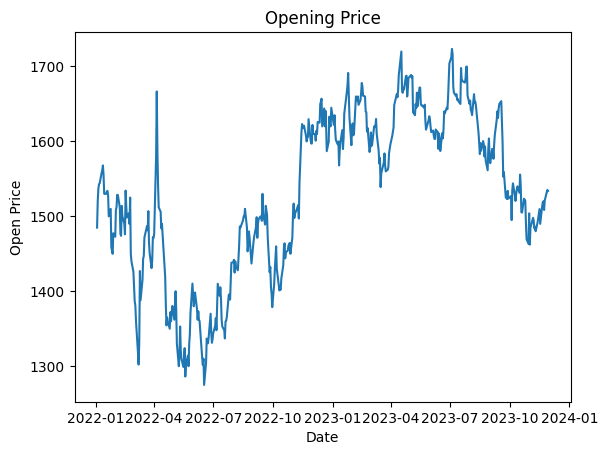

In [16]:
plt.figure()
plt.title('Opening Price')
plt.plot(df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.show()

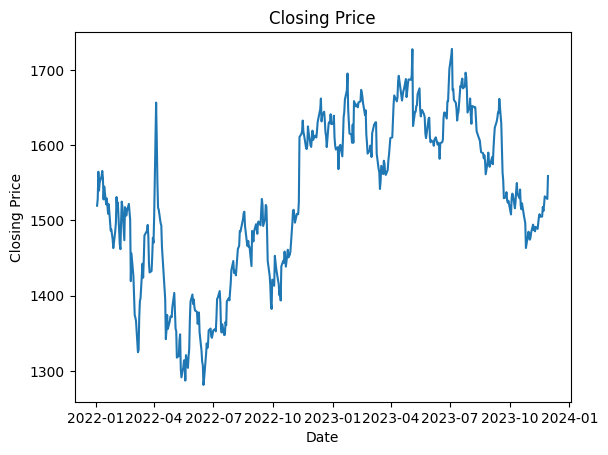

In [17]:
plt.figure()
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

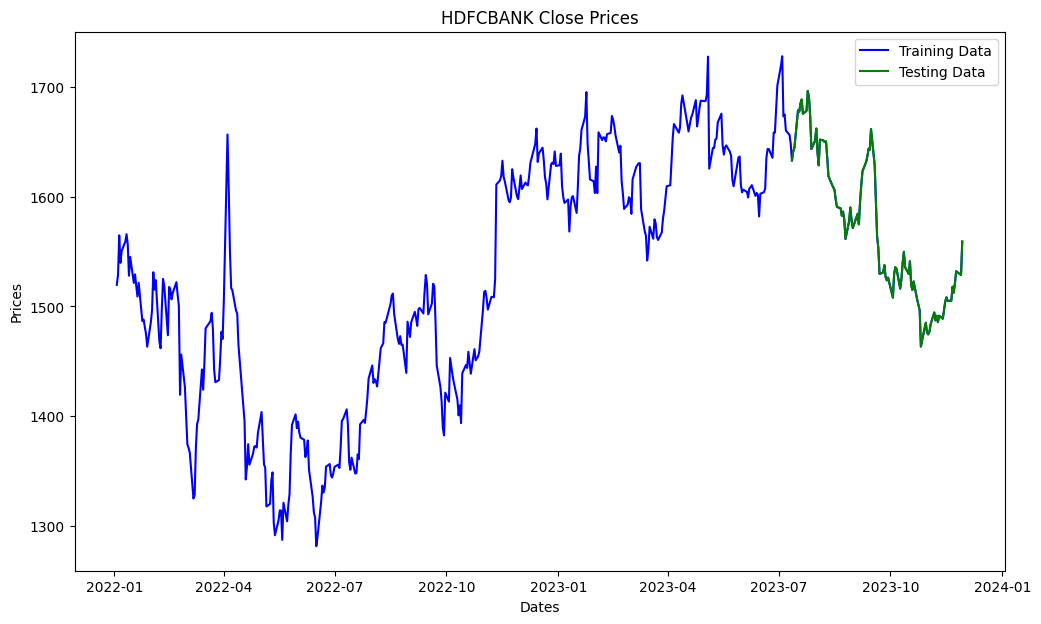

In [18]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('HDFCBANK Close Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

In [19]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()

for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)




<class 'list'>


In [20]:
error = mean_squared_error(test_ar, predictions)
print('MSE: %.3f' % error)

error2 = smape_kun(test_ar, predictions)
print('SMAE: %.3f' % error2)


rmse = np.sqrt(mean_squared_error(test_ar, predictions))
mae = mean_absolute_error(test_ar, predictions)

print("RMSE:", rmse)
print("MAE:", mae)


MSE: 215.473
SMAE: 0.709
RMSE: 14.678993605717539
MAE: 11.187970375741152


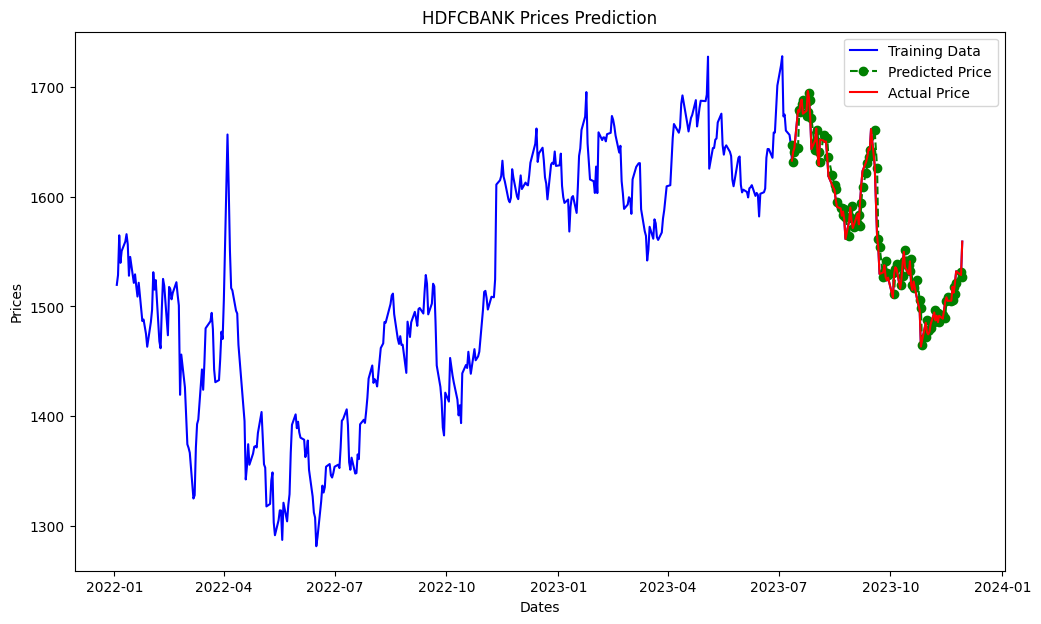

In [21]:
plt.figure(figsize=(12,7))
plt.plot(df['Close'],'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('HDFCBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

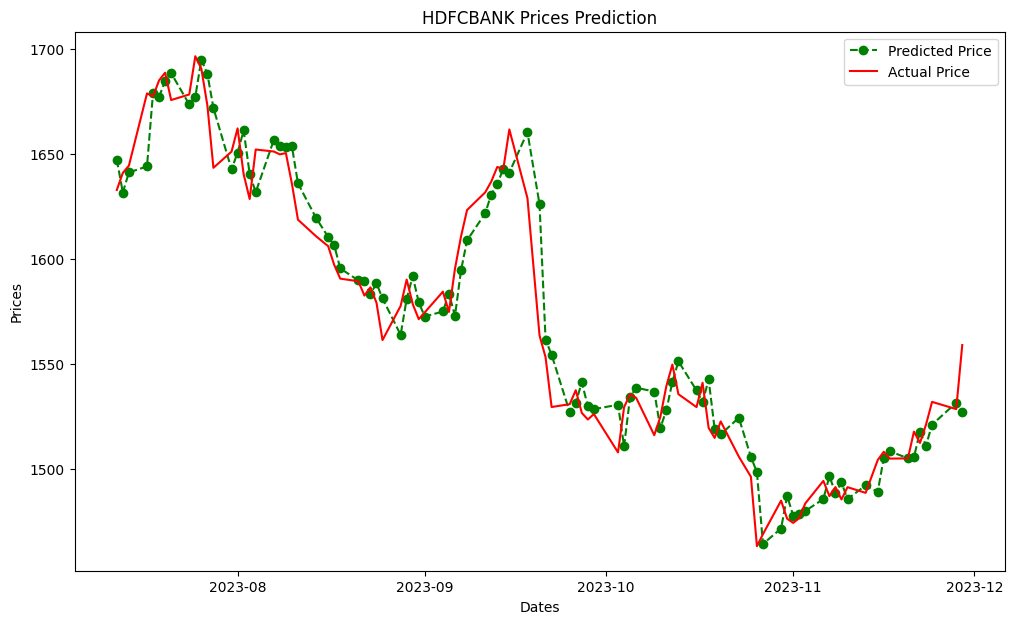

In [22]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('HDFCBANK Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [23]:
actual=pd.DataFrame()
actual=pd.DataFrame(test_ar,columns=["Actual"])
predicted=pd.DataFrame(list(predictions),columns=["Predicted"])
actual=actual.reset_index(drop=True)
predicted=predicted.reset_index(drop=True)
output=pd.concat([actual,predicted],axis=1)
print(output.head(10))

        Actual    Predicted
0  1632.949951  1647.390769
1  1641.099976  1631.730054
2  1644.500000  1641.295571
3  1678.900024  1644.163230
4  1677.500000  1679.192698
5  1685.099976  1677.164356
6  1688.750000  1685.036393
7  1675.750000  1688.544642
8  1678.400024  1673.642747
9  1696.599976  1677.252179


<h1><b>STOCK VALUE PREDICTED FOR TOMORROW<b></h1>

In [24]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(train_ar, order=(5, 1, 2))
model_fit = model.fit()

# Forecasting one step ahead (for tomorrow)
forecast = model_fit.forecast(steps=1)
predicted_value_tomorrow = forecast[0]

print('Predicted Stock Value for Tomorrow:', predicted_value_tomorrow)


Predicted Stock Value for Tomorrow: 1647.3907691432887


<h1><b>Getting Predictions for 60 days from now<b></h1>

In [25]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

# Assuming train_data and test_data are your datasets
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values

# Using the entire dataset to train the model
model = ARIMA(train_ar, order=(5, 1, 2))
model_fit = model.fit()

# Forecasting 60 days ahead
forecast = model_fit.forecast(steps=60)
predicted_values_60_days = forecast

print('Predicted Stock Values for the Next 60 Days:', predicted_values_60_days)


Predicted Stock Values for the Next 60 Days: [1647.39076914 1646.27768589 1645.90219017 1645.65847929 1645.83807383
 1646.02230447 1646.23684275 1646.44636816 1646.64995005 1646.82635047
 1646.97919714 1647.10931259 1647.21903635 1647.31028259 1647.38593717
 1647.44838621 1647.49976907 1647.54192968 1647.57647654 1647.60474718
 1647.62785912 1647.6467398  1647.66215638 1647.67473931 1647.68500634
 1647.69338186 1647.70021323 1647.70578445 1647.71032753 1647.71403197
 1647.71705241 1647.71951505 1647.72152284 1647.72315976 1647.72449429
 1647.72558228 1647.72646927 1647.72719238 1647.7277819  1647.72826249
 1647.72865429 1647.72897369 1647.72923408 1647.72944636 1647.72961942
 1647.7297605  1647.72987551 1647.72996928 1647.73004571 1647.73010803
 1647.73015883 1647.73020024 1647.73023401 1647.73026153 1647.73028397
 1647.73030226 1647.73031717 1647.73032933 1647.73033924 1647.73034732]
